In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# PREPROCESSING HAYA

first dataset


In [3]:
df = pd.read_csv('data/application_record.csv')
# Display first few rows of the dataset
print('HEAD')
print(df.head())

# Get basic info about the dataset
print('INFO')
print(df.info())

# Check for missing values
print('MISSING VALUES')
print(df.isnull().sum())

# Check basic statistics for numerical columns
print('')
print(df.describe())


HEAD
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -1

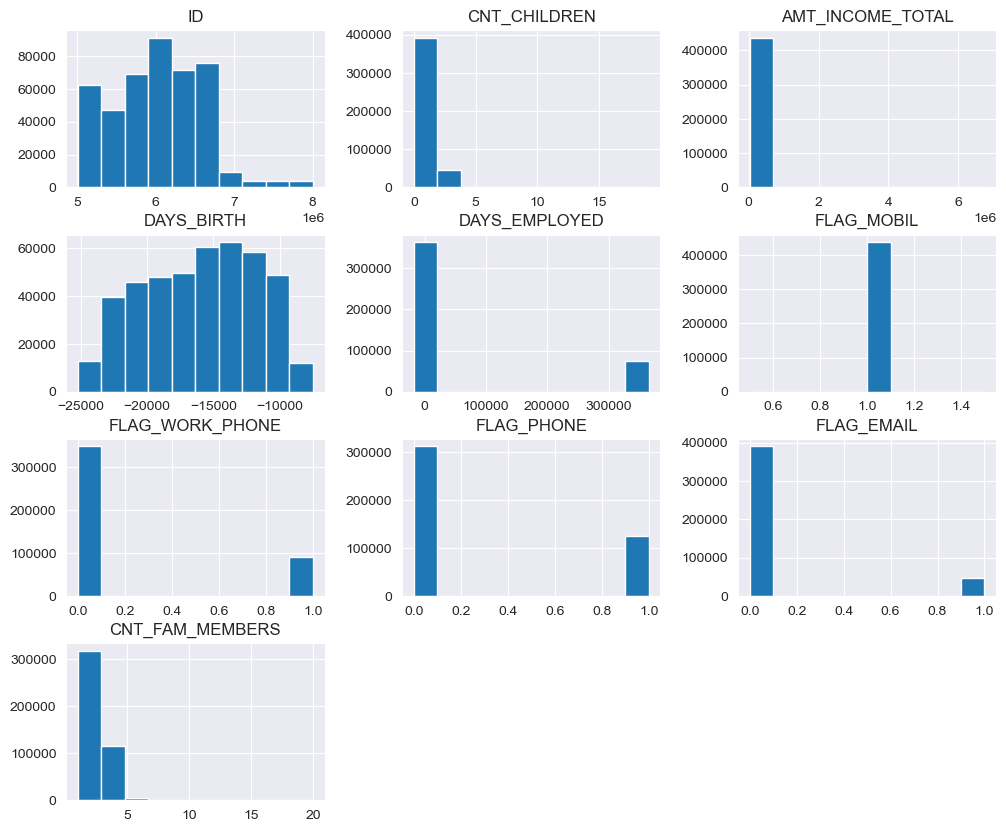

ValueError: could not convert string to float: 'M'

<Figure size 1000x800 with 0 Axes>

In [4]:
# Visualizing the distribution of numerical features
df.hist(figsize=(12, 10))
plt.show()

# Correlation heatmap to check relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.show()


In [ ]:
# Fill missing values in numerical columns with the median
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with the mode or 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Using the IQR method to detect and remove outliers for numerical columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to remove outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with outliers
df = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]


In [ ]:
1

In [ ]:
1

In [ ]:
1

In [ ]:
1

In [ ]:
1

In [ ]:
1

In [ ]:
1

In [ ]:
1

In [ ]:
1

In [ ]:
1

In [ ]:
1

# PREPROCESSING JANA
second dataset